In [7]:
#-----------------------------------------------------------------------------
#   INSTALAMOS LIBRERÍAS
#-----------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------
#   CARGAMOS LOS DATOS
#-----------------------------------------------------------------------------
df = pd.read_csv( "problemas_del_corazon.csv" )
df.columns

Index(['edad', 'genero', 'presion', 'colesterol', 'diabetico', 'cardiaco'], dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


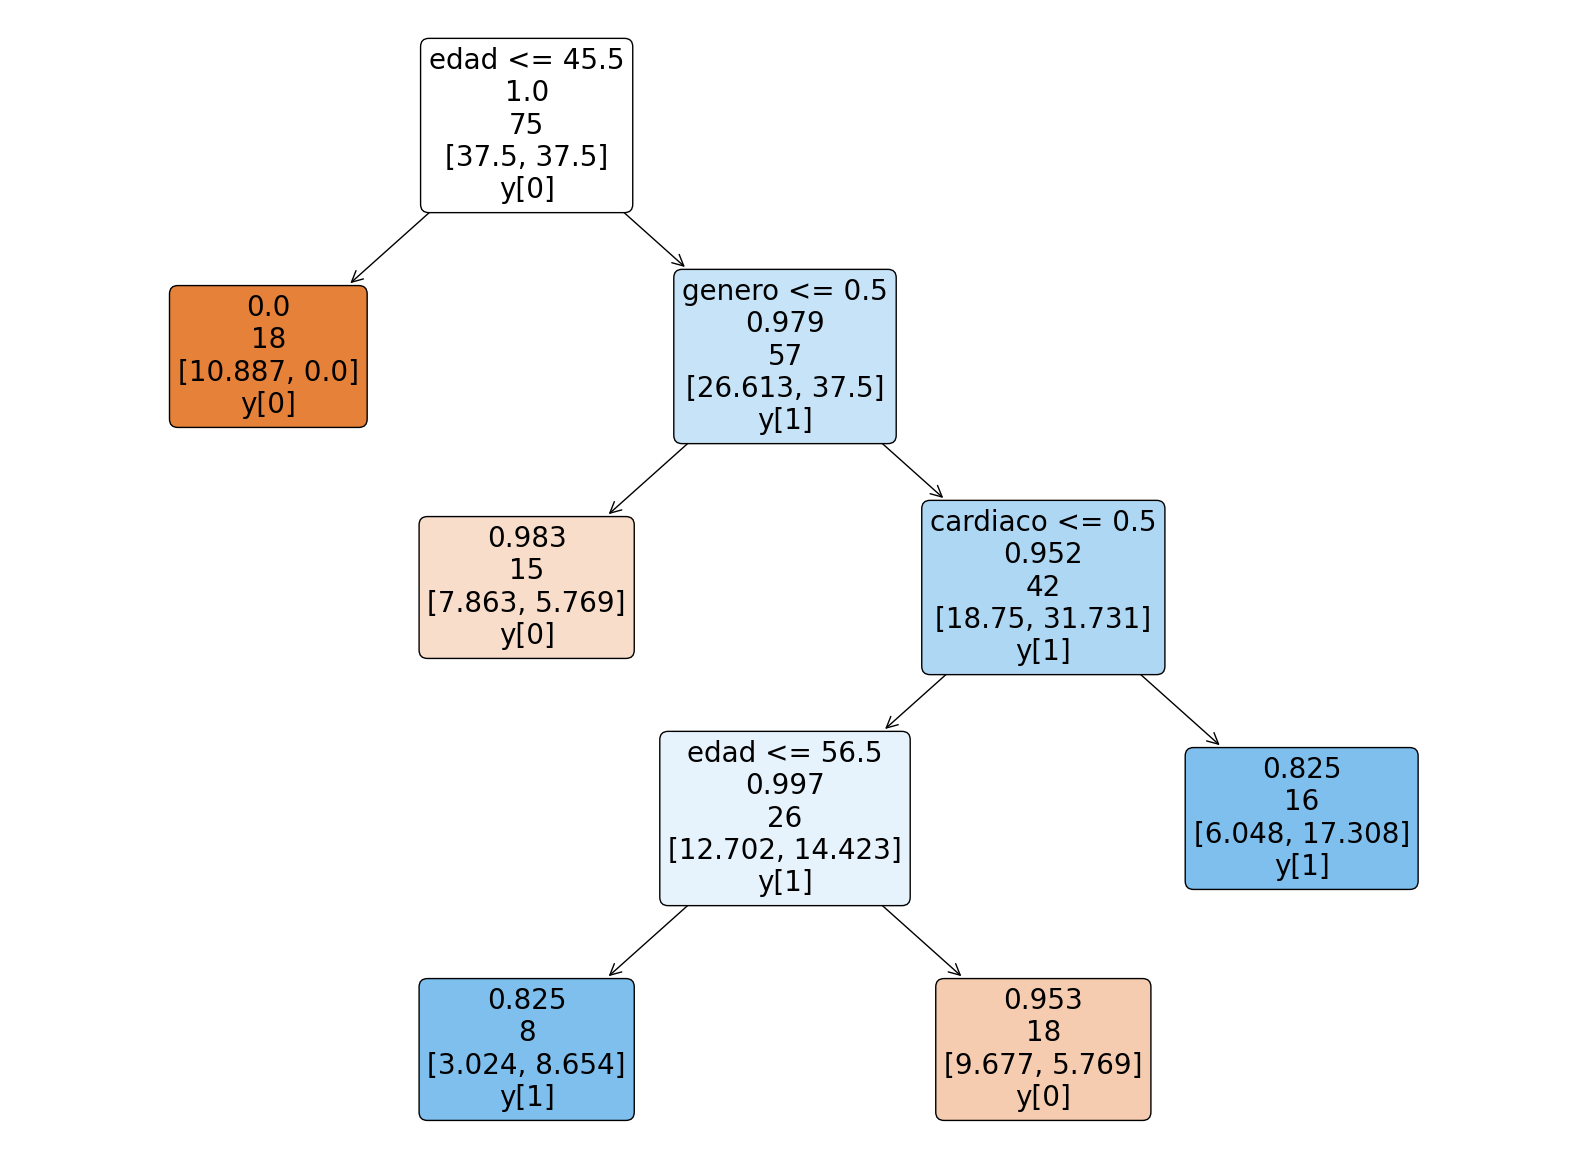

In [11]:
#-----------------------------------------------------------------------------
#   DATOS DE ENTRENAMIENTO Y PRUEBA
#-----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------------
datos = [ "edad", "genero", "presion", "cardiaco" ]
objetivo = [ "diabetico" ]
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    df[  datos  ],
    df[ objetivo ],
    test_size = 0.25              # 20
    )

#-----------------------------------------------------------------------------
#   CREACIÓN DEL ÁRBOL DE DECISIÓN
#-----------------------------------------------------------------------------
from sklearn import tree

#-----------------------------------------------------------------------------
#   DECISIONTREECLASSIFIER
#-----------------------------------------------------------------------------
#   criterion       medida de la calidad del árbol
#   splitter        estrategia para elegir la división de cada nodo
#   max_depth       profundidad máxima del árbol
#   min_samples_split   mínimo de muestras para realizar decisiones en el nodo
#   min_samples_leaf    mínimo de muestras de cada nodo hoja
#   min_weight_faction_leaf   peso mínimo de cada elemento de una hoja
#   max_features    número de aspectos a considerar para buscar la mejor división
#   random_state    controla la aleatoriedad del estimador
#   max_leaf_nodes  máximo de nodos
#   min_impurity_decrease   el nodo se dividirá si la impureza es mayor o igual al valor
#   class_weight    pesos asociados con cada clase
#   ccp_alpha       comploejidad para la poda de costo mínimo
#-----------------------------------------------------------------------------
arbol_decision = tree.DecisionTreeClassifier(
    criterion = "entropy",     # gini, entropy, log_loss
    splitter = "best",      # best, random
    max_depth = 5,            # int, None
    min_samples_split = 5,         # int, float  2
    min_samples_leaf =  2,           # int, float   1
    #min_weight_faction_leaf = 0.0,   # float, 0.0
    max_features = "auto",            # int, float, auto, sqrt, log2
    random_state = 50,              # int, RandomState, None
    max_leaf_nodes = 5,           # int, None
    min_impurity_decrease = 0.0,  # float, 0.0
    class_weight = "balanced",       # dict, list of dict, balanced, None
    ccp_alpha = 0.0               # float no negativo, 0.0
    )

arbol = arbol_decision.fit( datos_entrena, clase_entrena )

plt.figure( figsize = ( 20, 15 ) )

#-----------------------------------------------------------------------------
#   PLOT_TREE
#-----------------------------------------------------------------------------
#   decision_tree     (regressor, classifier)
#   max_depth         profundidad máxima de representación
#   feature_names     nombre de cada atributo
#   class_names       nombre de cada tipo de clase en orden numérica ascendente
#   label             si muestra información sobre las impurezas
#   filled            pinta los nodos para indicar la clase mayoritaria de clasificación
#   impurity          muestra las impurezas de cada nodo
#   node_ids          muestra el número ID de cada nodo
#   proportion        visualiza los valores según la proporcionalidad de los porcentajes
#   rounded           muestra cuadros con bordes redondeados
#   precision         número de dígitos de precisión
#   ax                ejes sobre los que dibujar
#   fontsize          tamaño del texto fuente
#-----------------------------------------------------------------------------
tree.plot_tree(
               decision_tree = arbol,    # árbol de decisión regresor o clasificador
               #max_depth      = 5,    # int, none
               feature_names  = datos,   # list of str, none
               class_names    = True,    # list of str, bool
               label          = False,     # all, root, none
               filled         = True,    # bool
               #impurity       = True,    # bool
               node_ids       = False,   # bool
               proportion     = False,    # bool
               rounded        = True,    # bool
               #precision      = 2,       # int 3
               #ax = 2,               # matplotlib axis
               fontsize       = 20       # None, automático
               )
plt.show()
